In [41]:
%%capture
import duckdb
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from pathlib import Path
import os

from dotenv import find_dotenv, load_dotenv

# Get variables from .env in parent directory
load_dotenv(find_dotenv())


PARQUET_URL = os.getenv("PARQUET_URL")

%load_ext sql
%sql duckdb:///:memory:
%config SqlMagic.autopandas = True

In [42]:
query = f"""
SELECT
    COUNT(*) AS total_trips,
    SUM(fare_amount + tip_amount) AS total_revenue,
    AVG(fare_amount) AS avg_fare,
    EXTRACT(HOUR FROM tpep_pickup_datetime) AS hour
FROM read_parquet('{PARQUET_URL}')
GROUP BY hour
ORDER BY hour;
"""

'''
# Method 1:
con = duckdb.connect(database=":memory:")
df = con.execute(query).df()
df.head()
'''

# Method 2:
df = %sql {{query}}

Running query in 'duckdb:///:memory:'

In [43]:
df.head()

,total_trips,total_revenue,avg_fare,hour
0,79094,1781924.66,19.202658,0
1,53627,1097272.49,17.527296,1
2,37517,722244.57,16.482882,2
3,24811,520199.02,18.150135,3
4,16742,429459.39,22.518645,4


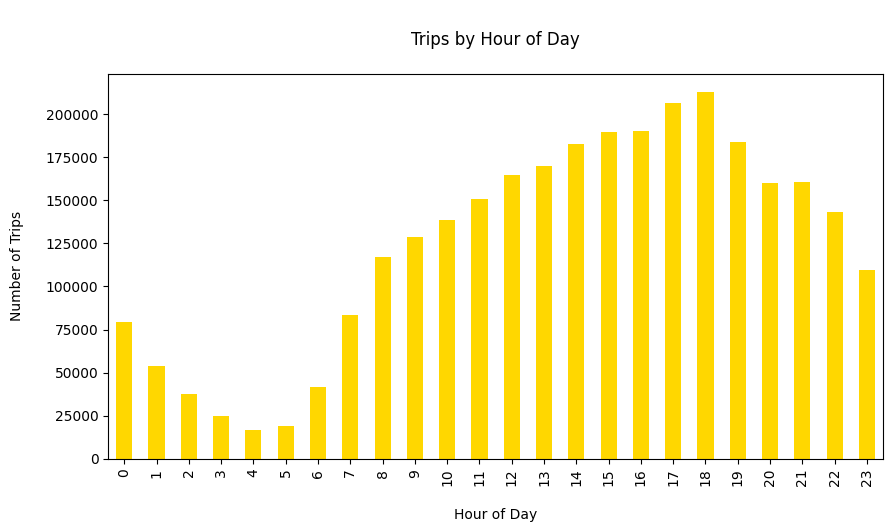

In [47]:
df.plot(x="hour", y="total_trips", kind="bar", figsize=(10,5), color='gold', legend=False)
plt.xlabel("\nHour of Day")
plt.ylabel("Number of Trips\n")
plt.title("\nTrips by Hour of Day\n")
plt.show()